In [4]:
# 流程：
# 1、加载数据
# 2、将数据集分成小批次
# 3、选择损失函数和优化器
# 4、初始化超参数（学习率，训练轮数，批量大小）
# 5、设计模型（隐藏层，激活函数）
# 6、训练模型
# 7、测试模型

In [5]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn         # 神经网络模块
import torch.optim as optim     # 优化器模块

from torch.utils.data import DataLoader  # 数据加载器，用于批量加载数据（将数据切成小份，即批次epoch）
# from torch.utils.data import random_split # 随机划分数据集

from torchvision.datasets import KMNIST # MNIST数据集,包含​​60,000张训练图像​​和​​10,000张测试图像​​，每张为​​28×28像素的灰度图​​，共​​10个类别​​。
from torchvision.transforms import ToTensor # 图像转换模块，用于数据预处理   将图像数据转换成张量，能得到一个张量的矩阵

In [6]:
# 加载数据集    60000张训练集，10000张测试集
train_dataset = KMNIST(root='data/KMNIST', 
                             train=True, 
                             download=True,
                             transform=ToTensor()) # 将数据集转换成张量
test_dataset = KMNIST(root='data/KMNIST', 
                            train=False, 
                            download=True,
                             transform=ToTensor()) 

加载后的 train_dataset 是 PyTorch 中的一个 ​​Dataset 对象​​，具体格式如下：  

​​1. 数据类型​​  
​​train_dataset​​ 是 torchvision.datasets.kmnist.KMNIST 类的实例。  
它继承自 PyTorch 的 VisionDataset，支持索引访问和迭代操作。  

​​2. 数据内容​​  
每个样本是一个 ​​元组 (image, label)​​，包含图像和标签：  
​1> ​image​​：经过 transform=ToTensor() 处理后的图像，格式为 torch.Tensor。  
​​形状​​：[1, 28, 28]（单通道灰度图像）。  
​​数值范围​​：像素值已归一化到 [0.0, 1.0]（原始像素值 [0, 255] 被除以 255）。  
​​2> label​​：对应字符的类别标签，格式为 int 整数，取值范围 0-9。  


In [7]:
train_dataset.__len__() # 训练集的长度 60000
test_dataset.__len__() # 测试集的长度 10000
train_dataset[0][0].shape # 训练集的第一个数据的形状 torch.Size([1, 28, 28])

type(train_dataset)

torchvision.datasets.mnist.KMNIST

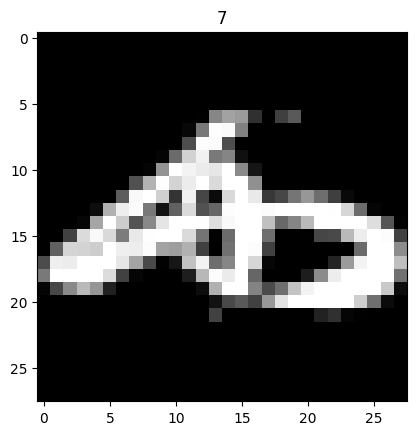

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
import matplotlib.pyplot as plt
# 可视化数据集中的一张图片
train_data = KMNIST(root='data/KMNIST', train=True, download=True)
# train_data是一个数据集对象，包含了训练数据和标签
# train_data[0]是一个元组，包含了图片和标签

img,clzz = train_data[1]
plt.imshow(img, cmap='gray')  # img是一个PIL.Image对象(python原始数据)
plt.title(clzz)
plt.show()

labels = set([clz for img,clz in train_data])
labels

In [9]:
# 数据加载器，将数据集分成小批次，方便训练和测试
# train_dataset, test_dataset = random_split(dataset, [60000, 10000]) # 随机划分数据集为训练集和测试集，60000张训练集，10000张测试集
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) # 训练集加载器，batch_size为每个批次的大小，shuffle为是否打乱数据
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False) # 测试集加载器，batch_size为每个批次的大小，shuffle为是否打乱数据

PyTorch的DataLoader类。  
DataLoader是一个迭代器，用于将数据集分成批次，并提供多线程加载等功能。  
当用户创建DataLoader实例时，比如这里的train_loader，它会包装之前的Dataset对象（这里是KMNIST的train_dataset）。

1. DataLoader 的核心功能​​  
​​批量加载​​：将数据集（Dataset）按 batch_size 分成多个小批次。  
​​数据打乱​​：如果 shuffle=True，每个 epoch（遍历整个数据集的周期）开始时随机打乱数据顺序。  
​​多进程加速​​：通过 num_workers 参数支持多进程并行加载数据（默认单进程）。  
​​自动组合​​：将多个样本的 (image, label) 元组合并为批量张量。

2. 从 train_loader 中获取的数据类型​​  
当通过 for 循环遍历 train_loader 时，每次迭代返回一个 ​​元组 (batch_images, batch_labels)​​：

​1> ​batch_images​​：形状为 [batch_size, 1, 28, 28] 的 torch.Tensor，表示一个批次的图像数据。
batch_size：批次大小（示例中为 64）。  
1：通道数（灰度图像单通道）。  
28, 28：图像高度和宽度。  

​​2> batch_labels​​：形状为 [batch_size] 的 torch.Tensor，表示对应的标签，数值为 0-9 的整数。 

In [10]:
train_loader  # <torch.utils.data.dataloader.DataLoader at 0x212565b6d10>
type(train_loader) # <class 'torch.utils.data.dataloader.DataLoader'>
# train_loader 的数据类型是 ​​torch.utils.data.DataLoader 类的实例​​，它是 PyTorch 中用于批量加载数据的迭代器对象

len(train_loader) # 937 训练集的批次数量 60000/64=937.5，向下取整
train_loader.dataset.__len__() # 训练集的长度 60000
# train_loader.shape  # AttributeError: 'DataLoader' object has no attribute 'shape'

60000

In [11]:
# 查看 train_loader 的类型
print(type(train_loader))  # <class 'torch.utils.data.dataloader.DataLoader'>

# 遍历一个批次
for batch_images, batch_labels in train_loader:
    print("批量图像形状:", batch_images.shape)  # torch.Size([64, 1, 28, 28])
    print("批量图像数据类型:", batch_images.dtype)  # torch.float32
    print("批量标签形状:", batch_labels.shape)  # torch.Size([64])
    print("批量标签数据类型:", batch_labels.dtype)  # torch.int64
    break  # 仅查看第一个批次

<class 'torch.utils.data.dataloader.DataLoader'>
批量图像形状: torch.Size([64, 1, 28, 28])
批量图像数据类型: torch.float32
批量标签形状: torch.Size([64])
批量标签数据类型: torch.int64


In [12]:
# 超参数设置
learning_rate = 0.01  # 学习率
num_epochs = 20  # 训练轮数
batch_size = 300  # 批量大小

In [ ]:
# 训练模型
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    train_loss_history = []  # 训练损失列表，用于存储每个批次的训练损失

    model.train()  # 设置模型为训练模式
    criterion = nn.CrossEntropyLoss()  # 损失函数，交叉熵损失函数
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # 优化器，SGD优化器，学习率为0.01

    for epoch in range(num_epochs):  # 遍历训练轮数
        for batch_images, batch_labels in train_loader:
            # 将图像数据展平为一维张量，batch_images.shape = [64, 1, 28, 28]，展平后为[64, 784]
            batch_images = batch_images.view(batch_images.size(0), -1)  # 展平图像数据
            # batch_images.shape = [64, 784]
            # batch_labels.shape = [64]  # 标签数据的形状为[64]，表示每个批次有64个标签

            # 前向传播
            outputs = model(batch_images)

            # 计算损失
            loss = criterion(outputs, batch_labels)

            # 清空梯度
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            # 更新参数
            optimizer.step()

        # 打印训练损失
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

        train_loss_history.append(loss.item())  # 将每个批次的训练损失添加到列表中

        # 训练完成后，保存模型
        # torch.save(model.state_dict(), 'model.pth')
        # break  # 仅训练一个批次
        
    return train_loss_history  # 返回训练损失列表，用于绘制损失曲线图

In [14]:
# 可视化训练损失
def plot_loss(train_loss_history):
    plt.plot(train_loss_history, label='Train Loss')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()

In [15]:
# # 定义模型
# model = nn.Sequential(
#     nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # 卷积层，输入通道数为1，输出通道数为32，卷积核大小为3x3，步长为1，填充为1
#     nn.ReLU(),  # 激活函数，ReLU激活函数
#     nn.MaxPool2d(kernel_size=2, stride=2),  # 池化层，最大池化层，池化核大小为2x2，步长为2
#     nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # 卷积层，输入通道数为32，输出通道数为64，卷积核大小为3x3，步长为1，填充为1
#     nn.ReLU(),  # 激活函数，ReLU激活函数
#     nn.MaxPool2d(kernel_size=2, stride=2),  # 池化层，最大池化层，池化核大小为2x2，步长为2
#     nn.Flatten(),  # 展平层，将多维张量展平为一维张量
#     nn.Linear(64 * 7 * 7, 10)  # 全连接层，将展平后的张量映射到10个类别
# )


# 定义模型 -- 神经元数量


In [16]:
# 定义模型 -- 神经元数量
model1 = nn.Sequential(
    nn.Linear(1 * 28 * 28, 64),  # 全连接层，将输入张量映射到64个神经元
    nn.Sigmoid(),  # 激活函数，ReLU激活函数
    nn.Linear(64, 10)  # 全连接层，将64个神经元映射到10个类别
)

In [17]:
model2 = nn.Sequential(
    nn.Linear(1 * 28 * 28, 128),  # 全连接层，将输入张量映射到128个神经元
    nn.Sigmoid(),  # 激活函数，ReLU激活函数
    nn.Linear(128, 10)  # 全连接层，将128个神经元映射到10个类别
)

In [18]:
model3 = nn.Sequential(
    nn.Linear(1 * 28 * 28, 192),  # 全连接层，将输入张量映射到192个神经元
    nn.Sigmoid(),  # 激活函数，ReLU激活函数
    nn.Linear(192, 10)  # 全连接层，将192个神经元映射到10个类别
)

In [19]:
# 开始训练模型1
model1_loss_history = train_model(model1, train_loader, None, None, num_epochs)     

Epoch [1/20], Loss: 2.0330
Epoch [2/20], Loss: 1.4673
Epoch [3/20], Loss: 1.5383
Epoch [4/20], Loss: 1.1322
Epoch [5/20], Loss: 0.9545
Epoch [6/20], Loss: 1.1518
Epoch [7/20], Loss: 0.6891
Epoch [8/20], Loss: 0.7366
Epoch [9/20], Loss: 0.7233
Epoch [10/20], Loss: 0.6762
Epoch [11/20], Loss: 0.6489
Epoch [12/20], Loss: 0.4379
Epoch [13/20], Loss: 0.6928
Epoch [14/20], Loss: 0.5539
Epoch [15/20], Loss: 0.6542
Epoch [16/20], Loss: 0.4675
Epoch [17/20], Loss: 0.5218
Epoch [18/20], Loss: 0.7321
Epoch [19/20], Loss: 0.4878
Epoch [20/20], Loss: 0.4255


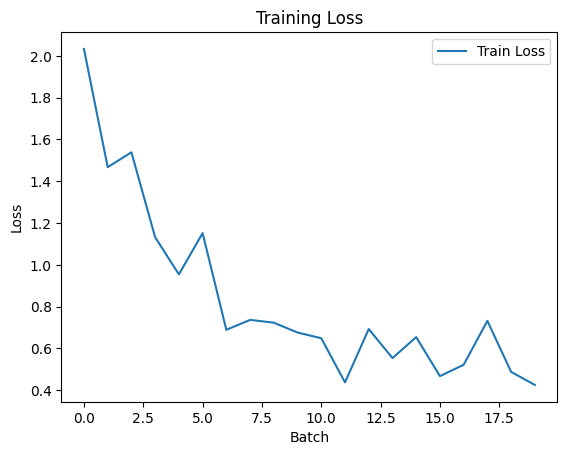

In [20]:
# 绘制训练损失曲线
plot_loss(model1_loss_history) 

In [21]:
# 开始训练模型2
model2_loss_history = train_model(model2, train_loader, None, None, num_epochs)  

Epoch [1/20], Loss: 2.0021
Epoch [2/20], Loss: 1.5215
Epoch [3/20], Loss: 1.2179
Epoch [4/20], Loss: 0.9942
Epoch [5/20], Loss: 1.1464
Epoch [6/20], Loss: 0.7669
Epoch [7/20], Loss: 0.5838
Epoch [8/20], Loss: 0.8053
Epoch [9/20], Loss: 0.7883
Epoch [10/20], Loss: 0.7064
Epoch [11/20], Loss: 0.5894
Epoch [12/20], Loss: 0.6492
Epoch [13/20], Loss: 0.6431
Epoch [14/20], Loss: 0.7322
Epoch [15/20], Loss: 0.4607
Epoch [16/20], Loss: 0.6098
Epoch [17/20], Loss: 0.6888
Epoch [18/20], Loss: 0.3589
Epoch [19/20], Loss: 0.4598
Epoch [20/20], Loss: 0.5427


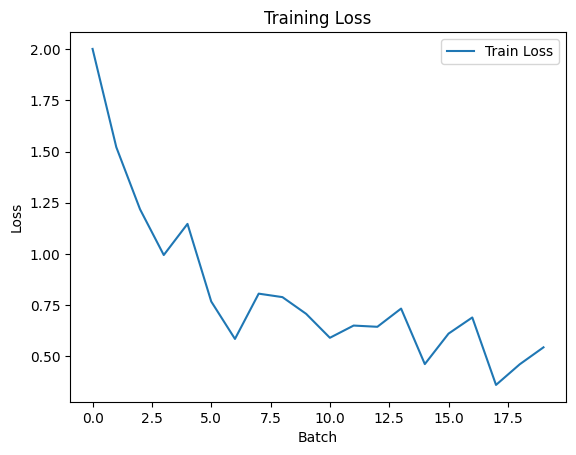

In [22]:
# 绘制训练损失曲线
plot_loss(model2_loss_history) 

In [38]:
# 开始训练模型3
model3_loss_history = train_model(model3, train_loader, None, None, num_epochs)  

Epoch [1/20], Loss: 0.5792
Epoch [2/20], Loss: 0.3510
Epoch [3/20], Loss: 0.4139
Epoch [4/20], Loss: 0.6381
Epoch [5/20], Loss: 0.4606
Epoch [6/20], Loss: 0.5688
Epoch [7/20], Loss: 0.3499
Epoch [8/20], Loss: 0.3815
Epoch [9/20], Loss: 0.4268
Epoch [10/20], Loss: 0.7907
Epoch [11/20], Loss: 0.3405
Epoch [12/20], Loss: 0.2989
Epoch [13/20], Loss: 0.4136
Epoch [14/20], Loss: 0.1989
Epoch [15/20], Loss: 0.6035
Epoch [16/20], Loss: 0.2866
Epoch [17/20], Loss: 0.3520
Epoch [18/20], Loss: 0.4239
Epoch [19/20], Loss: 0.3695
Epoch [20/20], Loss: 0.2283


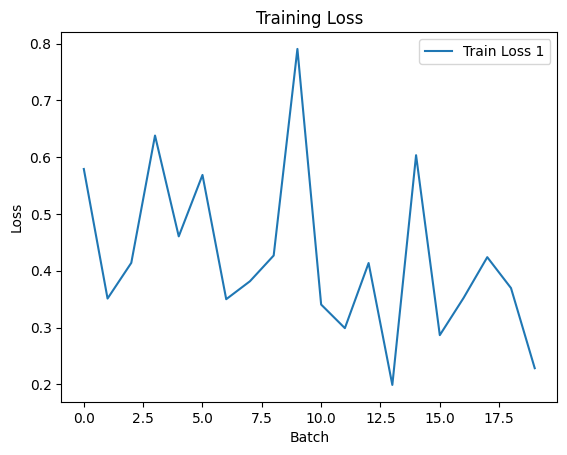

In [45]:
# 绘制训练损失曲线
plot_loss(model3_loss_history) 

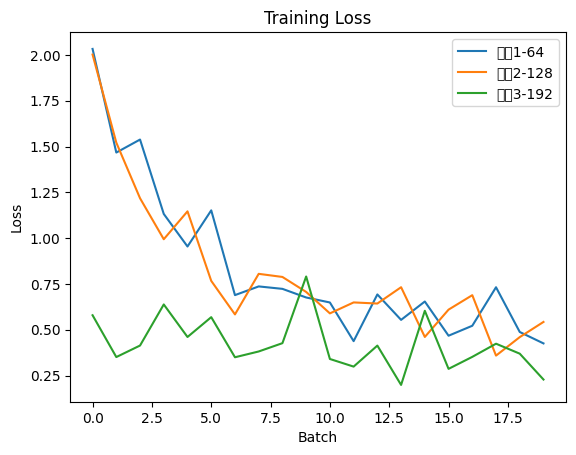

In [46]:
def plot_loss(*train_loss_histories, labels=None):
    # 生成默认标签（如果未提供）
    if labels is None:
        labels = [f'Train Loss {i+1}' for i in range(len(train_loss_histories))]
    elif len(labels) != len(train_loss_histories):
        raise ValueError("标签数量必须与损失历史数据数量一致")
    
    # 绘制每条损失曲线
    for loss_history, label in zip(train_loss_histories, labels):
        plt.plot(loss_history, label=label)
    
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()  # 显示图例以区分不同曲线
    plt.show()

# 示例调用（假设 loss1, loss2, loss3 是三个不同的损失列表）
plot_loss(model1_loss_history, model2_loss_history, model3_loss_history, labels=['模型1-64', '模型2-128', '模型3-192'])

In [ ]:
# 神经元数量对比
# 1. 模型1：64个神经元
# 2. 模型2：128个神经元
# 3. 模型3：192个神经元

In [43]:
model1_loss_history[19],model2_loss_history[19],model3_loss_history[19] # 训练损失曲线图的最后一个点的值

(0.42553025484085083, 0.5426862835884094, 0.22834306955337524)

# 定义模型 -- 隐藏层数量


In [27]:
# 定义模型 -- 隐藏层数量
model4 = nn.Sequential(
    nn.Linear(1 * 28 * 28, 128),  # 全连接层，将输入张量映射到128个神经元
    nn.Sigmoid(), 
    nn.Linear(128, 64),  # 全连接层，将128个神经元映射到64个神经元
    nn.Sigmoid(),  
    nn.Linear(64, 10)  # 全连接层，将64个神经元映射到10个类别
)


In [28]:
model5 = nn.Sequential(
    nn.Linear(1 * 28 * 28, 128),  # 全连接层，将输入张量映射到128个神经元
    nn.Sigmoid(), 
    nn.Linear(128, 64),  
    nn.Sigmoid(),  
    nn.Linear(64, 32), 
    nn.Sigmoid(),  
    nn.Linear(32, 10)  
)

In [29]:
# 开始训练模型4
model4_loss_history = train_model(model4, train_loader, None, None, num_epochs)  

Epoch [1/20], Loss: 2.3072
Epoch [2/20], Loss: 2.2911
Epoch [3/20], Loss: 2.2871
Epoch [4/20], Loss: 2.2572
Epoch [5/20], Loss: 2.2032
Epoch [6/20], Loss: 2.0137
Epoch [7/20], Loss: 1.9208
Epoch [8/20], Loss: 1.7946
Epoch [9/20], Loss: 1.6943
Epoch [10/20], Loss: 1.6508
Epoch [11/20], Loss: 1.6347
Epoch [12/20], Loss: 1.4417
Epoch [13/20], Loss: 1.0154
Epoch [14/20], Loss: 0.9157
Epoch [15/20], Loss: 1.0538
Epoch [16/20], Loss: 0.9147
Epoch [17/20], Loss: 0.8646
Epoch [18/20], Loss: 1.0230
Epoch [19/20], Loss: 0.6610
Epoch [20/20], Loss: 0.9206


In [30]:
# 开始训练模型5
model5_loss_history = train_model(model5, train_loader, None, None, num_epochs)  

Epoch [1/20], Loss: 2.3116
Epoch [2/20], Loss: 2.3060
Epoch [3/20], Loss: 2.3019
Epoch [4/20], Loss: 2.3034
Epoch [5/20], Loss: 2.2957
Epoch [6/20], Loss: 2.3007
Epoch [7/20], Loss: 2.3029
Epoch [8/20], Loss: 2.3085
Epoch [9/20], Loss: 2.3077
Epoch [10/20], Loss: 2.3048
Epoch [11/20], Loss: 2.3022
Epoch [12/20], Loss: 2.3012
Epoch [13/20], Loss: 2.3008
Epoch [14/20], Loss: 2.3057
Epoch [15/20], Loss: 2.3003
Epoch [16/20], Loss: 2.2945
Epoch [17/20], Loss: 2.2956
Epoch [18/20], Loss: 2.2944
Epoch [19/20], Loss: 2.2982
Epoch [20/20], Loss: 2.2965


In [39]:
model6 = nn.Sequential(
    nn.Linear(1 * 28 * 28, 128),  # 全连接层，将输入张量映射到128个神经元
    nn.Sigmoid(), 
    nn.Linear(128, 10) # 全连接层，将128个神经元映射到10个类别
)

In [40]:
# 开始训练模型6
model6_loss_history = train_model(model6, train_loader, None, None, num_epochs)  

Epoch [1/20], Loss: 2.0582
Epoch [2/20], Loss: 1.5935
Epoch [3/20], Loss: 1.0980
Epoch [4/20], Loss: 0.8392
Epoch [5/20], Loss: 0.8491
Epoch [6/20], Loss: 0.8949
Epoch [7/20], Loss: 0.7199
Epoch [8/20], Loss: 0.7154
Epoch [9/20], Loss: 0.9113
Epoch [10/20], Loss: 1.0939
Epoch [11/20], Loss: 0.6147
Epoch [12/20], Loss: 0.5408
Epoch [13/20], Loss: 0.7851
Epoch [14/20], Loss: 0.5028
Epoch [15/20], Loss: 0.5543
Epoch [16/20], Loss: 0.6587
Epoch [17/20], Loss: 0.5185
Epoch [18/20], Loss: 0.4648
Epoch [19/20], Loss: 0.3453
Epoch [20/20], Loss: 0.4641


d:\Users\helen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Users\helen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Users\helen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


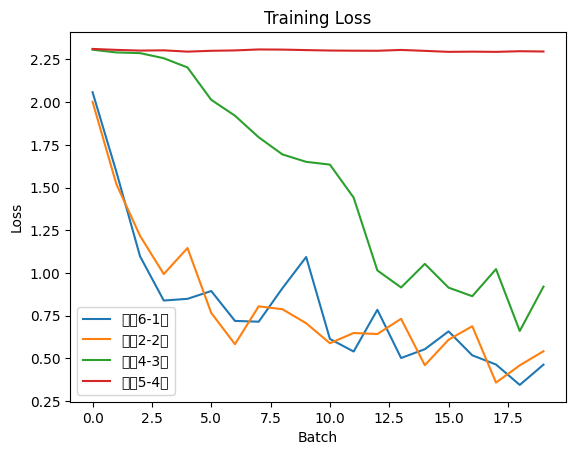

In [41]:
plot_loss(model6_loss_history,model2_loss_history, model4_loss_history, model5_loss_history, labels=['模型6-1层','模型2-2层', '模型4-3层', '模型5-4层'])

In [42]:
model6_loss_history[19], model2_loss_history[19], model4_loss_history[19], model5_loss_history[19] # 训练损失

(0.46406087279319763,
 0.5426862835884094,
 0.9205759763717651,
 2.296522855758667)

In [ ]:
# 隐藏层数量对比
# 1. 模型2：2层隐藏层
# 2. 模型4：3层隐藏层
# 3. 模型5：4层隐藏层
# 4. 模型6：1层隐藏层

# 隐藏层数量并不是越多越好，适当的隐藏层数量可以提高模型的性能。

In [ ]:

# 选择损失函数
criterion = nn.CrossEntropyLoss()  # 损失函数，交叉熵损失函数

# criterion = nn.MSELoss()  # 损失函数，均方误差损失函数

# criterion = nn.NLLLoss()  # 损失函数，负对数似然损失函数，适用于多分类问题
# criterion = nn.NLLLoss(reduction='none')  # 损失函数，负对数似然损失函数，适用于多分类问题，reduction='none'表示不进行归约操作
# criterion = nn.NLLLoss(reduction='sum')  # 损失函数，负对数似然损失函数，适用于多分类问题，reduction='sum'表示对所有样本的损失进行求和
# criterion = nn.NLLLoss(reduction='mean')  # 损失函数，负对数似然损失函数，适用于多分类问题，reduction='mean'表示对所有样本的损失进行求平均

# criterion = nn.BCEWithLogitsLoss()  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题
# criterion = nn.BCEWithLogitsLoss(reduction='none')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='none'表示不进行归约操作
# criterion = nn.BCEWithLogitsLoss(reduction='sum')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='sum'表示对所有样本的损失进行求和
# criterion = nn.BCEWithLogitsLoss(reduction='mean')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='mean'表示对所有样本的损失进行求平均

# criterion = nn.BCELoss()  # 损失函数，二进制交叉熵损失函数，适用于二分类问题
# criterion = nn.BCELoss(reduction='none')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='none'表示不进行归约操作
# criterion = nn.BCELoss(reduction='sum')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='sum'表示对所有样本的损失进行求和
# criterion = nn.BCELoss(reduction='mean')  # 损失函数，二进制交叉熵损失函数，适用于多标签分类问题，reduction='mean'表示对所有样本的损失进行求平均


# 选择优化器
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # 优化器，Adam优化器
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # 优化器，随机梯度下降优化器
# optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)  # 优化器，RMSprop优化器